In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_comp_salary_18-19')

In [3]:
qbs.dtypes

NAME          object
COMP           int64
COMP_rank    float64
salary         int64
dtype: object

In [4]:
qbs.head()

,NAME,COMP,COMP_rank,salary
0,Ben Roethlisberger,452,1.0,21850000
1,Andrew Luck,430,2.0,24594000
2,Kirk Cousins,425,3.0,28000000
3,Matt Ryan,422,4.0,30000000
4,Patrick Mahomes,383,5.0,4106447


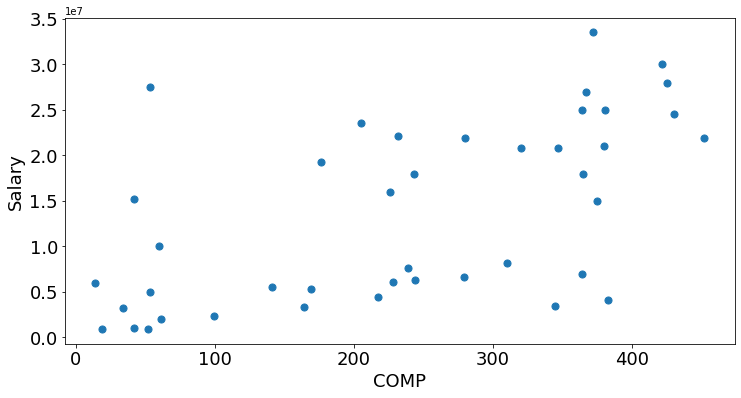

In [5]:
ax = qbs.plot(kind="scatter", x = 'COMP',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('COMP', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['COMP', 'salary']])

In [7]:
X.mean(axis = 0)

array([-7.40148683e-17, -8.72318091e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.39371496,  0.79633683],
       [ 0.28922336,  0.60665268],
       [ 0.38451325, -0.79206189],
       [ 1.18661114,  1.29554995],
       [-1.18707693, -1.01588275]])

In [11]:
km.predict(X)

array([3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 1, 2, 3, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4],
      dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,COMP,COMP_rank,salary,clusters
0,Ben Roethlisberger,452,1.0,21850000,3
1,Andrew Luck,430,2.0,24594000,3
2,Kirk Cousins,425,3.0,28000000,3
3,Matt Ryan,422,4.0,30000000,3
4,Patrick Mahomes,383,5.0,4106447,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[4.75000000e+01, 2.13750000e+07],
       [2.76900000e+02, 1.95355833e+07],
       [2.89888889e+02, 5.97188289e+06],
       [3.99222222e+02, 2.62160000e+07],
       [7.56666667e+01, 3.80143350e+06]])

In [14]:
qbs.groupby('clusters')[['COMP', 'salary']].mean()

,COMP,salary
clusters,,
0,47.500000,2.137500e+07
1,276.900000,1.953558e+07
2,289.888889,5.971883e+06
3,399.222222,2.621600e+07
4,75.666667,3.801434e+06


In [15]:
centroids = qbs.groupby('clusters')[['COMP', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

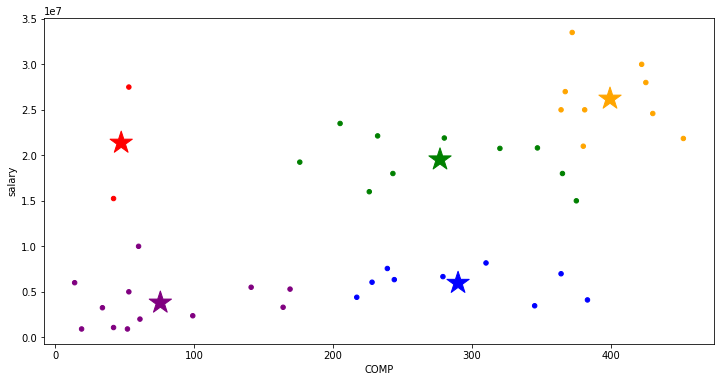

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'COMP', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'COMP', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

10.280630075587963

In [18]:
silhouette_score(X, km.labels_)

0.4602407917387604